The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


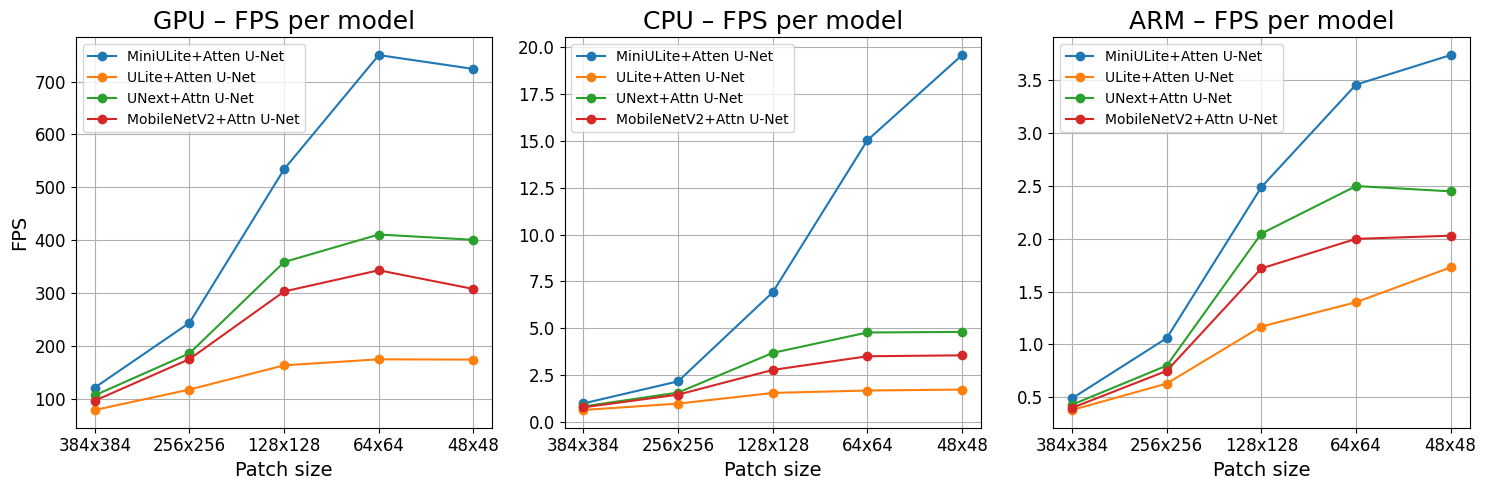

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


patch_sizes = ["48x48","64x64","128x128","256x256", "384x384"]

# MiniULite+Atten U-Net 
miniulite = {
    "GPU": [723.83, 750.07, 534.36, 243.85, 121.39],
    "CPU": [19.59,  15.04,  6.92,   2.16,   0.98],
    "ARM": [3.74,   3.46,   2.49,   1.06,   0.49],
}

# Todas as redes 
models = ["MiniULite+Atten U-Net", "ULite+Atten U-Net", "UNext+Attn U-Net", "MobileNetV2+Attn U-Net"]
gpu = [[723.83, 750.07, 534.36, 243.85, 121.39], 
       [174.23, 174.78, 163.41, 117.59, 78.97], 
       [400.73, 410.79, 358.73, 186.05, 106.73], 
       [307.77, 343.15, 303.09, 175.18, 96.60]]
cpu = [[19.59,  15.04,  6.92,   2.16,   0.98], 
       [1.72,   1.67,   1.54,   0.97,   0.63], 
       [4.80,   4.77,   3.68,   1.56,   0.82], 
       [3.55,   3.50,   2.77,   1.45,   0.77]]
arm = [[3.74,   3.46,   2.49,   1.06,   0.49], 
       [1.73,   1.4,    1.17,   0.63,   0.38], 
       [2.45,   2.5,    2.05,   0.80,   0.43], 
       [2.03,   2.00,   1.72,   0.75,   0.40]]


# ==========================
# Gráfico 2 – 1 plot per plataform
# ==========================
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

platforms = ["GPU", "CPU", "ARM"]
data = [gpu, cpu, arm]

for ax, platform, dataset in zip(axes, platforms, data):
    for model, values in zip(models, dataset):
        ax.plot(patch_sizes[::-1], values[::-1], marker='o', label=model)
    ax.set_title(f"{platform} – FPS per model", fontsize=18)
    ax.set_xlabel("Patch size", fontsize=14)
    ax.grid(True)
    if platform == "GPU":
        ax.set_ylabel("FPS", fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(fontsize=10)

plt.tight_layout()
plt.savefig("plots-per-plataform.eps")
plt.show()
